In [3]:
print("Hello World!")

Hello World!


In [4]:
# importing relevant modules
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from datetime import datetime

## Capital Bike Share

In [5]:
""""
This dataset contains the hourly and daily count of rental bikes between years 2022 and 2023 in Capital bikeshare system with the corresponding weather and seasonal information.

Additional Information aboutb the Variable.
Both hourly.csv and daily.csv have the following fields, except hour which is not available in daily.csv

 Casual: count of casual users
 Member: count of member users
 Date: Year:month:day
 Hour: (0 to 23)
 Total_rides: count of total rental bikes including both casual and members 
 relativehumidity_2m (%): Normalized humidity. The values are divided to 100
 temperature_2m (°C):Normalized temperature in Celsius
 apparent_temperature_mean (°C): Normalized feeling temperature in Celsius.
 weathercode (wmo code): represents different weather conditions. 
 windspeed_10m (km/h): Normalized wind speed 



"""

'"\nThis dataset contains the hourly and daily count of rental bikes between years 2022 and 2023 in Capital bikeshare system with the corresponding weather and seasonal information.\n\nAdditional Information aboutb the Variable.\nBoth hourly.csv and daily.csv have the following fields, except hour which is not available in daily.csv\n\n Casual: count of casual users\n Member: count of member users\n Date: Year:month:day\n Hour: (0 to 23)\n Total_rides: count of total rental bikes including both casual and members \n relativehumidity_2m (%): Normalized humidity. The values are divided to 100\n temperature_2m (°C):Normalized temperature in Celsius\n apparent_temperature_mean (°C): Normalized feeling temperature in Celsius.\n weathercode (wmo code): represents different weather conditions. \n windspeed_10m (km/h): Normalized wind speed \n\n\n\n'

## Loading Hourly Dataset

In [6]:
# loading csv file
hour=pd.read_csv("CBS_2021-2023_Hourly_Weather.csv", sep=None)

C:\Users\godwi\AppData\Local\Temp\ipykernel_656\2537278405.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  hour=pd.read_csv("CBS_2021-2023_Hourly_Weather.csv", sep=None)


In [7]:
# getting summary of Data set
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Casual                   26269 non-null  float64
 1   Date                     26280 non-null  object 
 2   Hour                     26280 non-null  int64  
 3   Member                   26269 non-null  float64
 4   Total_rides              26269 non-null  float64
 5   relativehumidity_2m (%)  26280 non-null  int64  
 6   temperature_2m (°C)      26280 non-null  float64
 7   weathercode (wmo code)   26280 non-null  int64  
 8   windspeed_10m (km/h)     26280 non-null  float64
dtypes: float64(5), int64(3), object(1)
memory usage: 1.8+ MB


In [8]:
hour.head()

,Casual,Date,Hour,Member,Total_rides,relativehumidity_2m (%),temperature_2m (°C),weathercode (wmo code),windspeed_10m (km/h)
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9


In [9]:
# getting the statistics of the Dataset
hour.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Casual,26269.0,159.93,167.33,0.0,28.00,105.0,237.00,1206.0
Hour,26280.0,11.50,6.92,0.0,5.75,11.5,17.25,23.0
Member,26269.0,247.17,225.28,0.0,55.00,203.0,371.00,1534.0
Total_rides,26269.0,407.10,373.01,1.0,85.00,319.0,616.00,2262.0
relativehumidity_2m (%),26280.0,62.97,22.72,5.0,46.00,64.0,82.00,100.0
temperature_2m (°C),26280.0,14.41,10.29,-14.6,6.10,14.8,22.70,41.5
weathercode (wmo code),26280.0,7.23,17.63,0.0,0.00,1.0,2.00,75.0
windspeed_10m (km/h),26280.0,10.17,5.26,0.0,6.50,9.2,12.90,40.1


In [10]:
#getting the shape of the DataFrame
hour.shape

(26280, 9)

## Data Wrangling

Renaming some features

In [11]:
## renaming some features
hour.rename(columns={'Member': 'Registered'}, inplace=True)

In [13]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Casual                   26269 non-null  float64
 1   Date                     26280 non-null  object 
 2   Hour                     26280 non-null  int64  
 3   Registered               26269 non-null  float64
 4   Total_rides              26269 non-null  float64
 5   relativehumidity_2m (%)  26280 non-null  int64  
 6   temperature_2m (°C)      26280 non-null  float64
 7   weathercode (wmo code)   26280 non-null  int64  
 8   windspeed_10m (km/h)     26280 non-null  float64
dtypes: float64(5), int64(3), object(1)
memory usage: 1.8+ MB


In [14]:
hour.head(10)

,Casual,Date,Hour,Registered,Total_rides,relativehumidity_2m (%),temperature_2m (°C),weathercode (wmo code),windspeed_10m (km/h)
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9
5,11.0,2021-01-01,5,3.0,14.0,75,1.4,2,8.7
6,8.0,2021-01-01,6,18.0,26.0,72,1.4,2,8.9
7,10.0,2021-01-01,7,17.0,27.0,71,1.4,3,7.9
8,22.0,2021-01-01,8,33.0,55.0,71,1.4,3,7.1
9,22.0,2021-01-01,9,54.0,76.0,70,1.6,3,7.2


### Checking for Missing values

In [15]:
## checking for missing values in Data Set
hour.isnull().sum()
## Missing values for casual, member,total_rides are 11,11,11 respectively

Casual                     11
Date                        0
Hour                        0
Registered                 11
Total_rides                11
relativehumidity_2m (%)     0
temperature_2m (°C)         0
weathercode (wmo code)      0
windspeed_10m (km/h)        0
dtype: int64

Dropping of missing values

In [16]:
#dropping missing values
hour.dropna(inplace=True)

In [17]:
#resetting index of the Data Frame
hourly=hour.reset_index(drop=True)
# get the info of the Data Frame
print(hourly.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26269 entries, 0 to 26268
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Casual                   26269 non-null  float64
 1   Date                     26269 non-null  object 
 2   Hour                     26269 non-null  int64  
 3   Registered               26269 non-null  float64
 4   Total_rides              26269 non-null  float64
 5   relativehumidity_2m (%)  26269 non-null  int64  
 6   temperature_2m (°C)      26269 non-null  float64
 7   weathercode (wmo code)   26269 non-null  int64  
 8   windspeed_10m (km/h)     26269 non-null  float64
dtypes: float64(5), int64(3), object(1)
memory usage: 1.8+ MB
None


converting some columns to integer

In [18]:
# convert some features to correct Data type 
hour['Casual'] = hour['Casual'].astype(int)
hour['Registered'] = hour['Registered'].astype(int)
hour['Total_rides'] = hour['Total_rides'].astype(int)

## Creating of new columns

In [19]:
#Season
# Function to get season
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Fall"

# Function to categorize season based on date
def categorize_season(date):
    dt = datetime.strptime(date, "%Y-%m-%d")
    month = dt.month
    return get_season(month)

# Apply function to create a new column
hourly['Season'] = hourly['Date'].apply(categorize_season)



In [20]:
##WEEKDAY
# Function to get weekday
def get_weekday(day):
    weekdays = ["Mon.", "Tue.", "Wed.", "Thur.", "Fri.", "Sat.", "Sun."]
    return weekdays[day]

# Function to categorize weekday based on date
def categorize_week(date):
    dt = datetime.strptime(date, "%Y-%m-%d")
    weekday = dt.weekday()  # 0 for Monday, 1 for Tuesday, ..., 6 for Sunday
    return get_weekday(weekday)

# Apply function to create a new column
hourly['Weekday'] = hourly['Date'].apply(categorize_week)

In [21]:
#Month
# Function to get month
def get_month(month):
    months = ["Jan.", "Feb.", "Mar.", "Apr.", "May", "Jun.", "Jul.", "Aug.", "Sep.", "Oct.", "Nov.", "Dec."]
    return months[month - 1]

# Function to categorize month based on date
def categorize_month(date):
    dt = datetime.strptime(date, "%Y-%m-%d")
    month = dt.month
    return get_month(month)

# Apply function to create a new column
hourly['Month'] = hourly['Date'].apply(categorize_month)

In [22]:
## Minutes
# Function to convert hours to minutes
def hours_to_minutes(hour):
    return hour * 60

# Apply function to create a new column 'Minutes'
hourly['Minutes'] = hourly['Hour'].apply(hours_to_minutes)


In [23]:
hourly.head()

,Casual,Date,Hour,Registered,Total_rides,relativehumidity_2m (%),temperature_2m (°C),weathercode (wmo code),windspeed_10m (km/h),Season,Weekday,Month,Minutes
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2,Winter,Fri.,Jan.,0
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0,Winter,Fri.,Jan.,60
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1,Winter,Fri.,Jan.,120
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6,Winter,Fri.,Jan.,180
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9,Winter,Fri.,Jan.,240


In [24]:
hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26269 entries, 0 to 26268
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Casual                   26269 non-null  float64
 1   Date                     26269 non-null  object 
 2   Hour                     26269 non-null  int64  
 3   Registered               26269 non-null  float64
 4   Total_rides              26269 non-null  float64
 5   relativehumidity_2m (%)  26269 non-null  int64  
 6   temperature_2m (°C)      26269 non-null  float64
 7   weathercode (wmo code)   26269 non-null  int64  
 8   windspeed_10m (km/h)     26269 non-null  float64
 9   Season                   26269 non-null  object 
 10  Weekday                  26269 non-null  object 
 11  Month                    26269 non-null  object 
 12  Minutes                  26269 non-null  int64  
dtypes: float64(5), int64(4), object(4)
memory usage: 2.6+ MB


2021 Data Frame

In [25]:
# Convert 'Date' column to datetime type
hourly['Date'] = pd.to_datetime(hourly['Date'])

# Filter the DataFrame for rows where the year is 2021
hourly_2021 = hourly[hourly['Date'].dt.year == 2021]


In [26]:
hourly_2021.shape

(8752, 13)

In [27]:
# resetting index
hourly_2021.reset_index(inplace=True)
#dropping the index column
hourly_2021.drop(["index"],axis=1, inplace=True)

C:\Users\godwi\AppData\Local\Temp\ipykernel_656\2109429784.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hourly_2021.drop(["index"],axis=1, inplace=True)


2022 Data Frame

In [28]:
# Convert 'Date' column to datetime type
hourly['Date'] = pd.to_datetime(hourly['Date'])
# Filter the DataFrame for rows where the year is 2021
hourly_2022 = hourly[hourly['Date'].dt.year == 2022]


In [29]:
hourly_2022.shape

(8758, 13)

In [30]:
# resetting index
hourly_2022.reset_index(inplace=True)
#dropping the index column
hourly_2022.drop(["index"],axis=1, inplace=True)


C:\Users\godwi\AppData\Local\Temp\ipykernel_656\3099469902.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hourly_2022.drop(["index"],axis=1, inplace=True)


2023 Data Frame

In [31]:
# Convert 'Date' column to datetime type
hourly['Date'] = pd.to_datetime(hourly['Date'])

# Filter the DataFrame for rows where the year is 2021
hourly_2023 = hourly[hourly['Date'].dt.year == 2023]


In [32]:
hourly_2023.shape

(8759, 13)

In [33]:
# resetting index
hourly_2023.reset_index(inplace=True)
# dropping the index column
hourly_2023.drop(["index"],axis=1, inplace=True)


C:\Users\godwi\AppData\Local\Temp\ipykernel_656\2019195505.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hourly_2023.drop(["index"],axis=1, inplace=True)


In [34]:
hourly_2023.tail()

,Casual,Date,Hour,Registered,Total_rides,relativehumidity_2m (%),temperature_2m (°C),weathercode (wmo code),windspeed_10m (km/h),Season,Weekday,Month,Minutes
8754,132.0,2023-12-31,19,190.0,322.0,71,-7.7,0,3.3,Winter,Sun.,Dec.,1140
8755,125.0,2023-12-31,20,194.0,319.0,79,-10.2,0,6.7,Winter,Sun.,Dec.,1200
8756,84.0,2023-12-31,21,137.0,221.0,80,-11.0,0,10.0,Winter,Sun.,Dec.,1260
8757,83.0,2023-12-31,22,142.0,225.0,80,-10.4,0,8.7,Winter,Sun.,Dec.,1320
8758,82.0,2023-12-31,23,106.0,188.0,73,-8.5,0,3.7,Winter,Sun.,Dec.,1380


## Exploratory Data Analysis

Some Hypotheses formulation

In [35]:
"""""
Hourly trend: most of the businesses have rush hours and weak hours. It should not be an exception for bike rentals as well.

Daily Trend: weekdays vs weekends and registered users vs casual users.

Relative humdity: the demand for bikes might be changed on a rainy day as compared to a sunny day. Similarly, people prefer to go out on less humid days.

Temperature: in warm countries, temperature generally keeps people inside.

Business model: businesses often rely on customers who are members more than casual users. There might be some interesting insights that can strengthen this assumption.
"""

'""\nHourly trend: most of the businesses have rush hours and weak hours. It should not be an exception for bike rentals as well.\n\nDaily Trend: weekdays vs weekends and registered users vs casual users.\n\nRelative humdity: the demand for bikes might be changed on a rainy day as compared to a sunny day. Similarly, people prefer to go out on less humid days.\n\nTemperature: in warm countries, temperature generally keeps people inside.\n\nBusiness model: businesses often rely on customers who are members more than casual users. There might be some interesting insights that can strengthen this assumption.\n'

Temporal Analysis

Text(0.5, 1.0, 'Monthly Distribution of Bike Total Rides 2023')

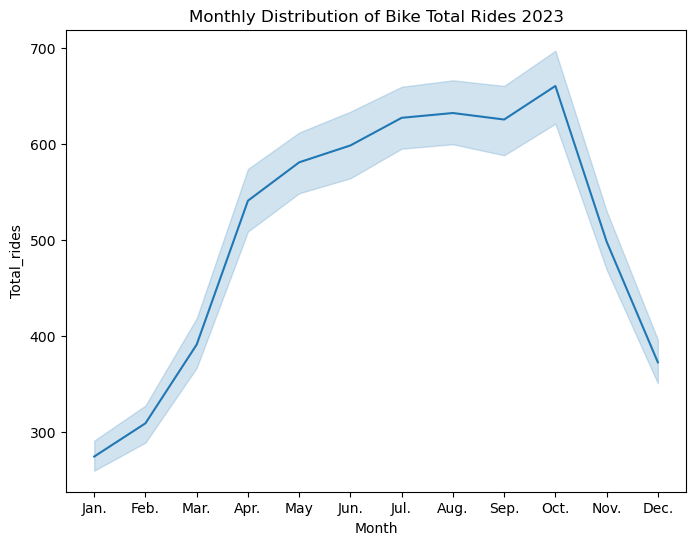

In [59]:
#Explore ride counts over time (daily, hourly, monthly) using line plots or bar plots.
## Month
plt.figure(figsize=(8, 6))
sns.lineplot(x="Month", y="Total_rides",
          
             data=hourly_2023)
plt.title("Monthly Distribution of Bike Total Rides 2023")

Text(0.5, 1.0, 'Daily Distribution of Bike Total Rides 2023')

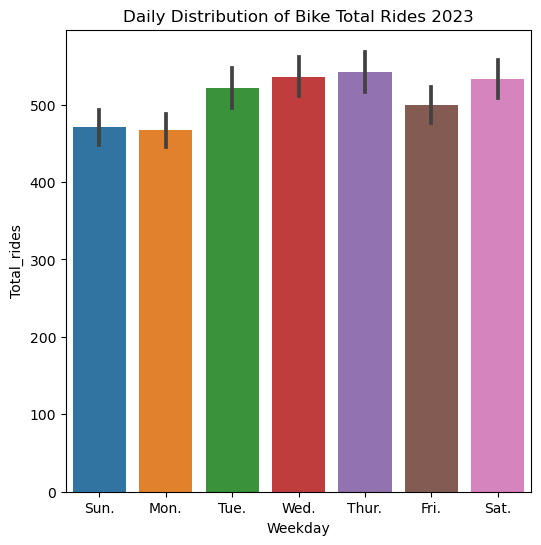

In [57]:
plt.figure(figsize=(6, 6))
sns.barplot(x="Weekday", y="Total_rides",
          
             data=hourly_2023)
plt.title("Daily Distribution of Bike Total Rides 2023")

Text(0.5, 1.0, 'Season wise Hourly Distribution of Bike Total Rides 2023')

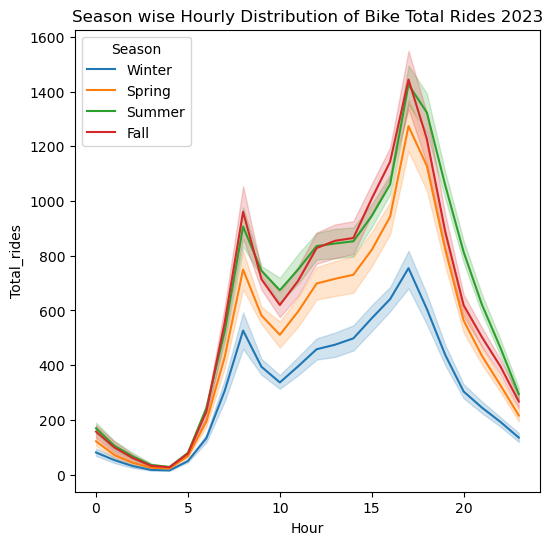

In [61]:

#sns.set_theme(style="darkgrid")

# Load an example dataset with long-form data


plt.figure(figsize=(6, 6))
sns.lineplot(x="Hour", y="Total_rides",
             hue="Season",
             data=hourly_2023)
plt.title("Season wise Hourly Distribution of Bike Total Rides 2023")

Text(0.5, 1.0, '2021 Minutes Ride Count')

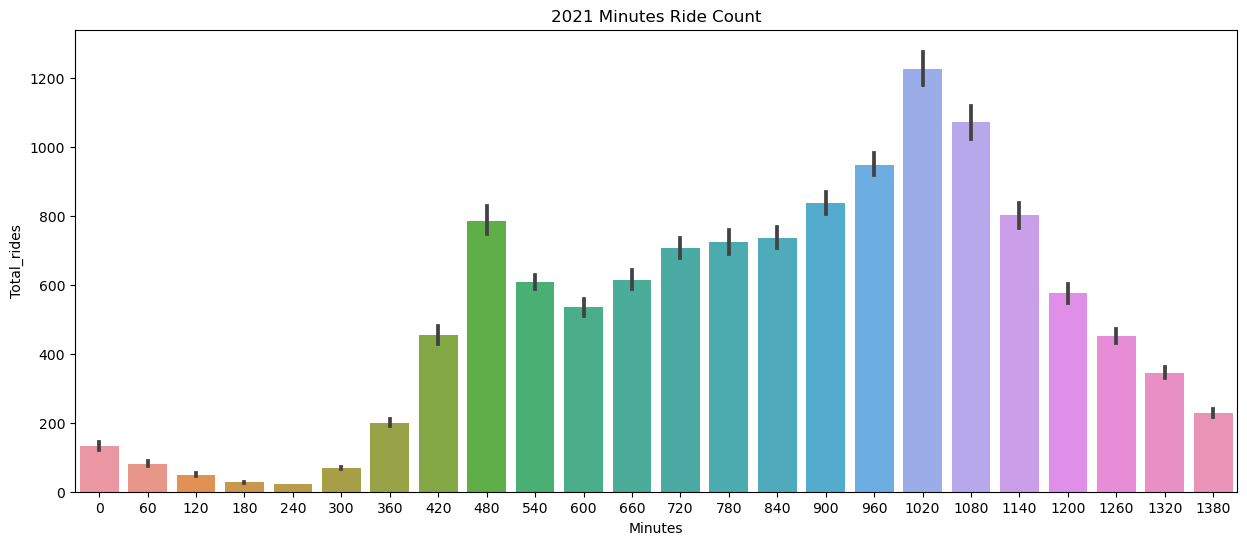

In [39]:
plt.figure(figsize=(15, 6))
sns.barplot(x="Minutes", y="Total_rides",
      
             data=hourly_2023)
plt.title("2021 Minutes Ride Count")

In [64]:
#Categorical Variables:

#Explore distribution of rides by categorical variables such as season, weather conditions, holidays, etc. using bar plots or count plots.




In [40]:
season_analysis_2023=hourly_2023.iloc[:,[9,0,3,4]]

In [41]:
season_analysis_2023_copy= season_analysis_2023.copy()
season_analysis_2023

,Season,Casual,Registered,Total_rides
0,Winter,57.0,77.0,134.0
1,Winter,96.0,100.0,196.0
2,Winter,107.0,74.0,181.0
3,Winter,46.0,34.0,80.0
4,Winter,11.0,15.0,26.0
...,...,...,...,...
8754,Winter,132.0,190.0,322.0
8755,Winter,125.0,194.0,319.0
8756,Winter,84.0,137.0,221.0
8757,Winter,83.0,142.0,225.0


In [42]:
season_analysis_result=season_analysis_2023.groupby("Season").sum()

Text(0.5, 1.0, 'Season Analysis 2023')

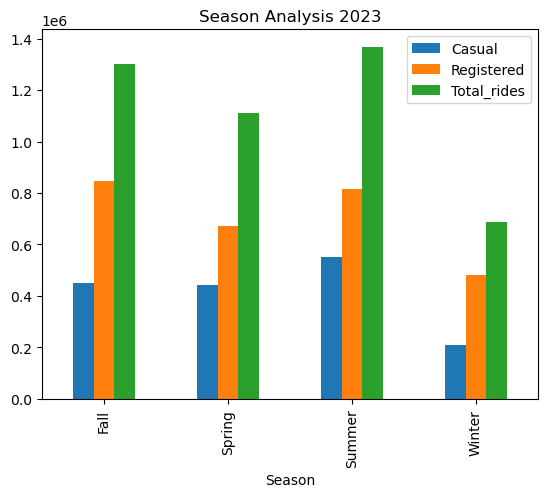

In [43]:
#sns.barplot(data=season_analysis_result)
season_analysis_result.plot.bar()
plt.title("Season Analysis 2023")

In [44]:
season_analysis_2023_copy.drop(["Total_rides"], axis=1, inplace=True)



In [45]:
season_analysis_2023_copy

,Season,Casual,Registered
0,Winter,57.0,77.0
1,Winter,96.0,100.0
2,Winter,107.0,74.0
3,Winter,46.0,34.0
4,Winter,11.0,15.0
...,...,...,...
8754,Winter,132.0,190.0
8755,Winter,125.0,194.0
8756,Winter,84.0,137.0
8757,Winter,83.0,142.0


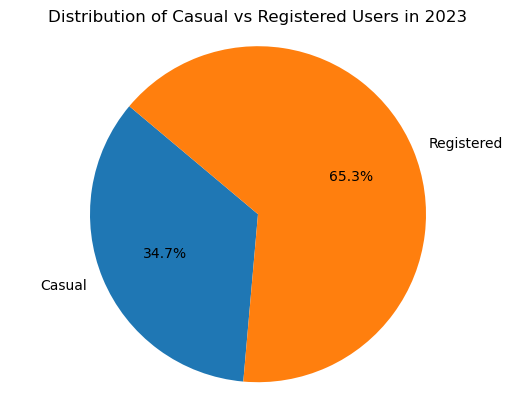

In [46]:
# Sample data


# Aggregate data by summing up 'Casual' and 'Registered' counts
season_counts = season_analysis_2023_copy.groupby('Season').sum().reset_index()

# Plotting
labels = ['Casual', 'Registered']
sizes = season_counts.loc[0, ['Casual', 'Registered']].values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Title
plt.title('Distribution of Casual vs Registered Users in 2023')

# Show plot
plt.show()


In [47]:
weekday_analysis=hourly.iloc[:,[10,0,3,4]]

In [48]:
weekday_analysis_result=weekday_analysis.groupby("Weekday").sum()

<Axes: xlabel='Weekday'>

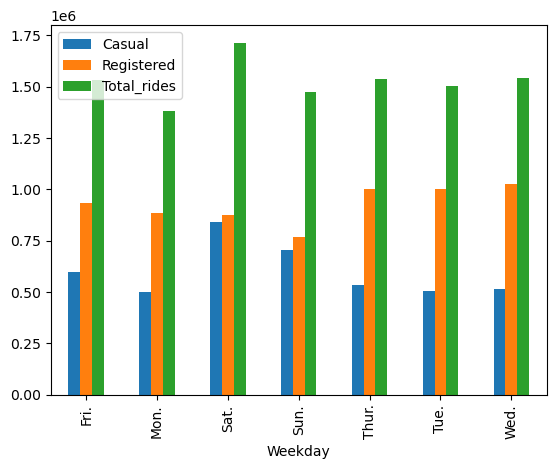

In [49]:
weekday_analysis_result.plot.bar()

In [50]:
hourly_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Casual                   8759 non-null   float64       
 1   Date                     8759 non-null   datetime64[ns]
 2   Hour                     8759 non-null   int64         
 3   Registered               8759 non-null   float64       
 4   Total_rides              8759 non-null   float64       
 5   relativehumidity_2m (%)  8759 non-null   int64         
 6   temperature_2m (°C)      8759 non-null   float64       
 7   weathercode (wmo code)   8759 non-null   int64         
 8   windspeed_10m (km/h)     8759 non-null   float64       
 9   Season                   8759 non-null   object        
 10  Weekday                  8759 non-null   object        
 11  Month                    8759 non-null   object        
 12  Minutes                  8759 non-

In [51]:
temp_analysis=hourly_2023.iloc[:,[6,0,3,4]]

In [52]:
temp_analysis

,temperature_2m (°C),Casual,Registered,Total_rides
0,10.7,57.0,77.0,134.0
1,10.1,96.0,100.0,196.0
2,9.9,107.0,74.0,181.0
3,10.1,46.0,34.0,80.0
4,9.5,11.0,15.0,26.0
...,...,...,...,...
8754,-7.7,132.0,190.0,322.0
8755,-10.2,125.0,194.0,319.0
8756,-11.0,84.0,137.0,221.0
8757,-10.4,83.0,142.0,225.0


In [53]:
sns.lineplot(x="temperature_2m (°C)", y="Total_rides")

ValueError: Could not interpret value `temperature_2m (°C)` for parameter `x`

In [ ]:
temp_analysis["temperature_2m (°C)"].describe()

: 

In [ ]:
#plt.figure(figsize=(15.10))
#temp_analysis.plot.scatter(x="temperature_2m (°C)", y="Total_rides")
#plt.figure(figsize=(15, 10))
#plt.scatter(x=temp_analysis["temperature_2m (°C)"], y=temp_analysis["Total_rides"])

: 